# Import Libraries

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns;sns.set()
import numpy as np #Linear Algebra operation
import pandas as pd #data processing
from sklearn.cluster import KMeans

# Loading the dataset

In [2]:
data = pd.read_csv("D:\Machine Learning (Pycharm IDE)\Kaggle Competitions\Mall Customer Segmentation (KMean) - Unsupervised ML\Mall_Customers.csv") 
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


# Data Processing

In [3]:
#allowing cell multiple outputs
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [4]:
#Dropping CustomerID column
data1 = data.drop(columns='CustomerID')

In [5]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
Gender                    200 non-null object
Age                       200 non-null int64
Annual Income (k$)        200 non-null int64
Spending Score (1-100)    200 non-null int64
dtypes: int64(3), object(1)
memory usage: 6.3+ KB


In [6]:
data1.isna().sum()

Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [7]:
size = data1.Gender.value_counts()
size

Female    112
Male       88
Name: Gender, dtype: int64

<Figure size 600x900 with 0 Axes>

([<matplotlib.patches.Wedge at 0x153bd960d30>,
 [Text(-0.22485758633183298, 1.1787446991902115, 'Female'),
  Text(0.20611945413751367, -1.080515974257694, 'Male')],
 [Text(-0.1311669253602359, 0.6876010745276234, '56%'),
  Text(0.11242879316591654, -0.5893723495951058, '44%')])

Text(0.5, 1.0, 'Gender Composition')

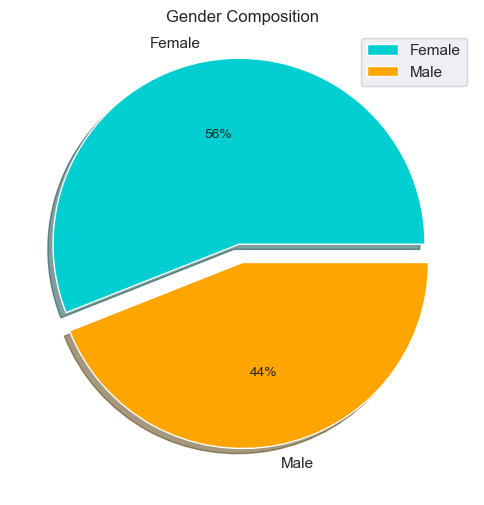

In [8]:
#piechart
Labels = ['Female', 'Male']
colors = ['darkturquoise', 'orange']
explode = [0.1, 0]

plt.figure(figsize= (6,9), dpi =100,facecolor='white')
plt.pie(size, labels= Labels, colors= colors, explode= explode, autopct='%0.0f%%', shadow=True)
plt.title('Gender Composition')
plt.legend()
plt.show()

<Figure size 4500x1800 with 0 Axes>

(array([0.03269231, 0.02692308, 0.01346154, 0.02307692, 0.02307692,
        0.04230769, 0.03846154, 0.01730769, 0.02115385, 0.00961538,
        0.01538462, 0.03461538, 0.01346154, 0.01538462, 0.00384615,
        0.01538462, 0.00576923, 0.00576923, 0.01538462, 0.01153846]),
 array([18. , 20.6, 23.2, 25.8, 28.4, 31. , 33.6, 36.2, 38.8, 41.4, 44. ,
        46.6, 49.2, 51.8, 54.4, 57. , 59.6, 62.2, 64.8, 67.4, 70. ]),
 <a list of 20 Patch objects>)

Text(0.5, 1.0, 'Histogram of Age')

(array([0.0147541 , 0.00491803, 0.00983607, 0.00819672, 0.00983607,
        0.01311475, 0.01147541, 0.01967213, 0.00983607, 0.0147541 ,
        0.01803279, 0.01147541, 0.00163934, 0.00491803, 0.00491803,
        0.        , 0.00163934, 0.00163934, 0.00163934, 0.00163934]),
 array([ 15. ,  21.1,  27.2,  33.3,  39.4,  45.5,  51.6,  57.7,  63.8,
         69.9,  76. ,  82.1,  88.2,  94.3, 100.4, 106.5, 112.6, 118.7,
        124.8, 130.9, 137. ]),
 <a list of 20 Patch objects>)

Text(0.5, 1.0, 'Histogram of Annual Income (k$)')

(array([0.00918367, 0.00714286, 0.0122449 , 0.00816327, 0.00306122,
        0.00714286, 0.00918367, 0.00816327, 0.01734694, 0.01836735,
        0.01734694, 0.02040816, 0.00612245, 0.00510204, 0.01122449,
        0.01326531, 0.00510204, 0.00918367, 0.01020408, 0.00612245]),
 array([ 1. ,  5.9, 10.8, 15.7, 20.6, 25.5, 30.4, 35.3, 40.2, 45.1, 50. ,
        54.9, 59.8, 64.7, 69.6, 74.5, 79.4, 84.3, 89.2, 94.1, 99. ]),
 <a list of 20 Patch objects>)

Text(0.5, 1.0, 'Histogram of Spending Score (1-100)')

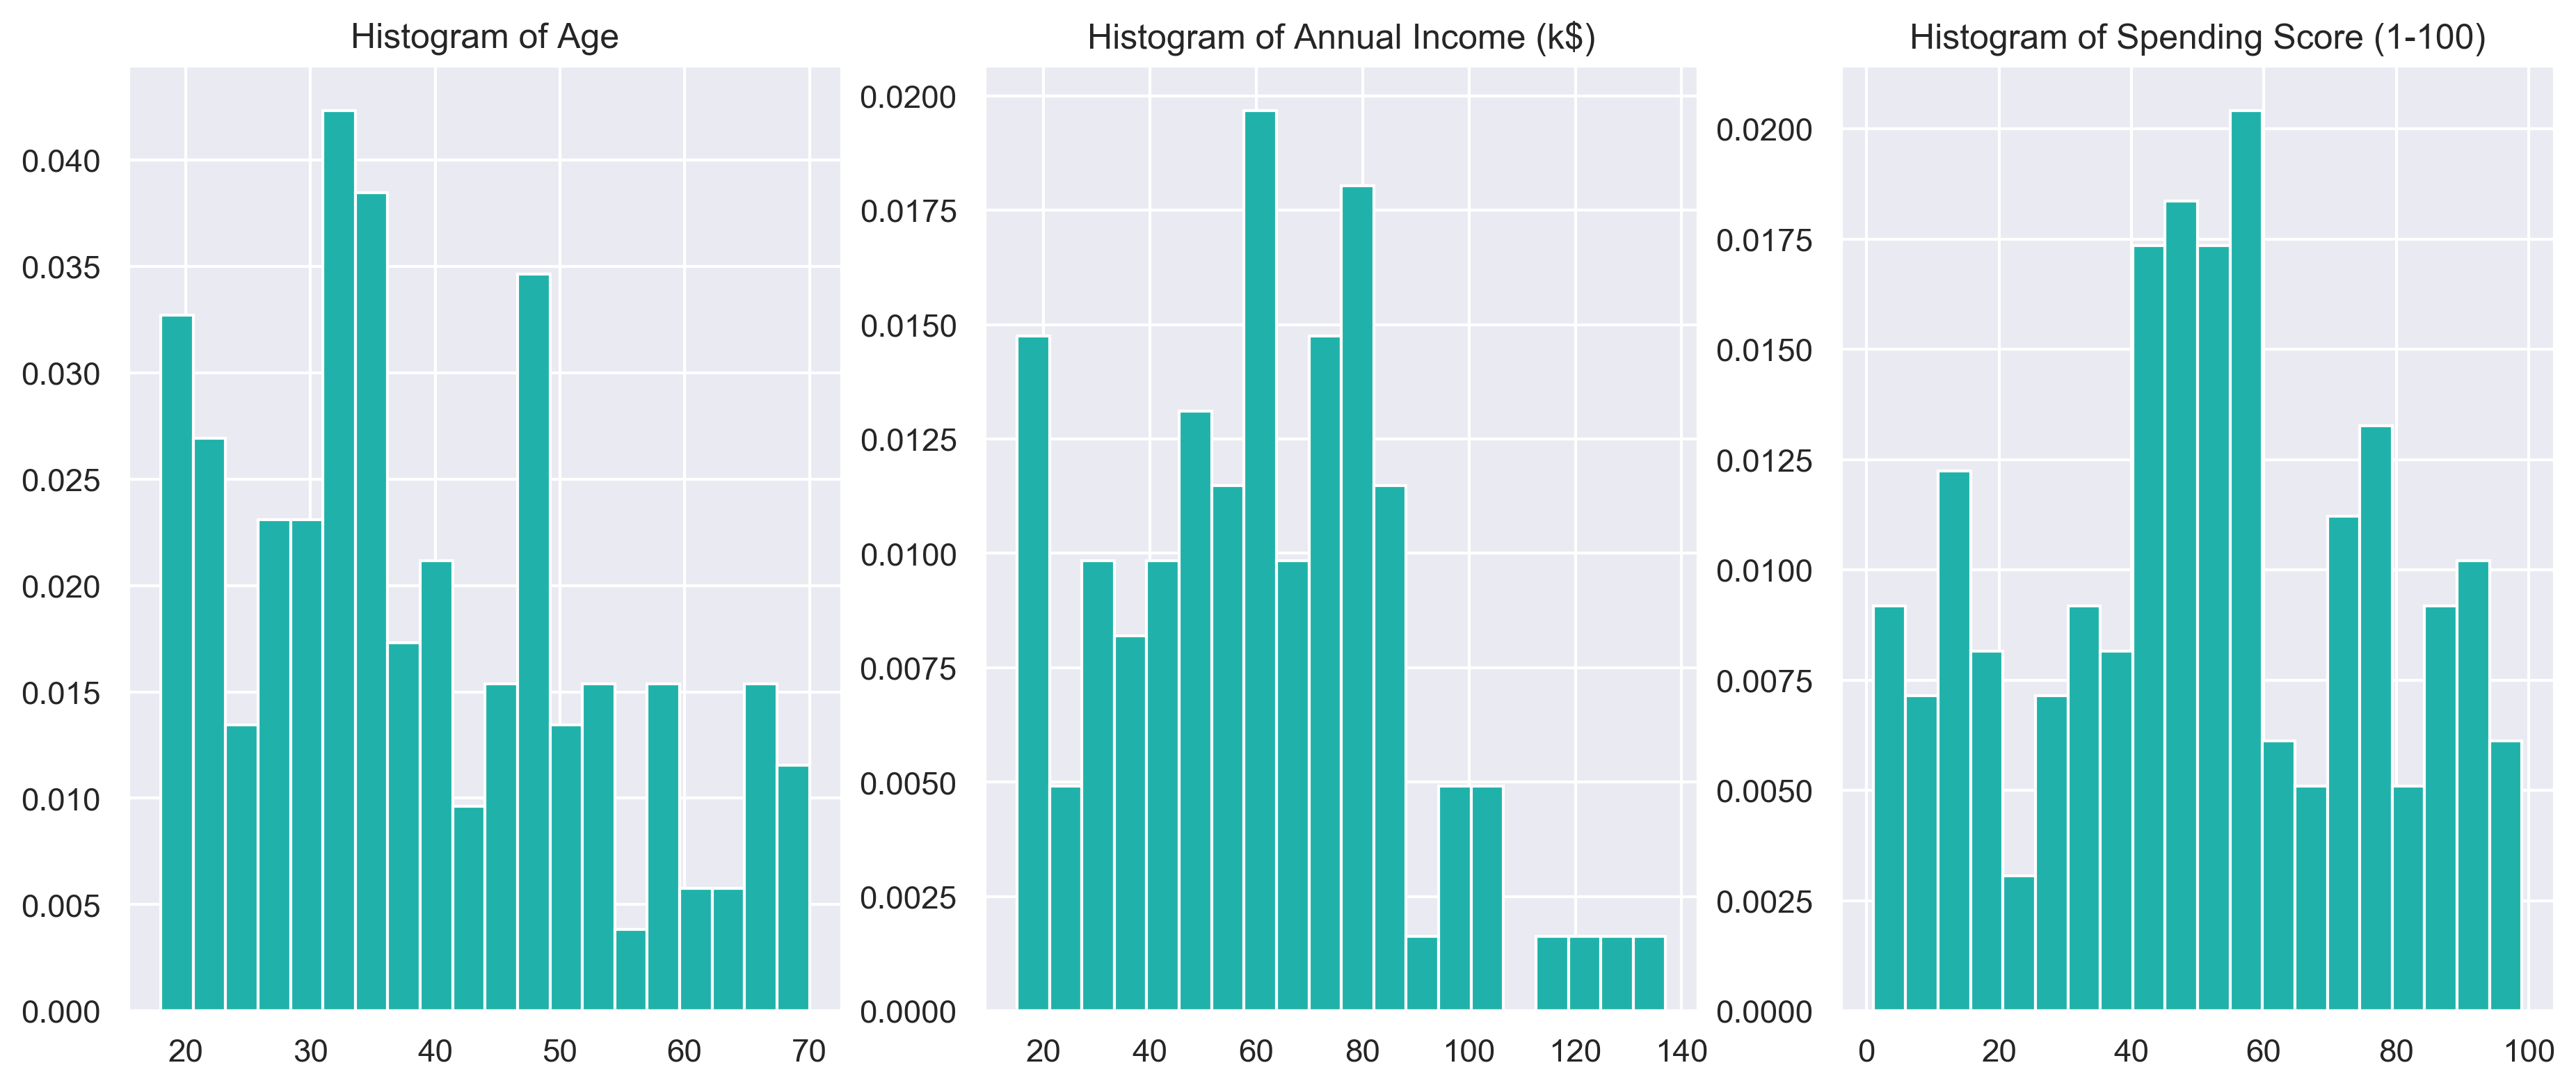

In [9]:
#histogram
plt.figure(figsize=(15,6), dpi =300,facecolor='white')
n =0
for x in ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']:
    n +=1
    plt.subplot(1,3,n)
    plt.hist(data1[x], bins=20, color= 'lightseagreen', density= True)
    plt.title('Histogram of {}'.format(x))
plt.show()

<Figure size 6000x4500 with 0 Axes>

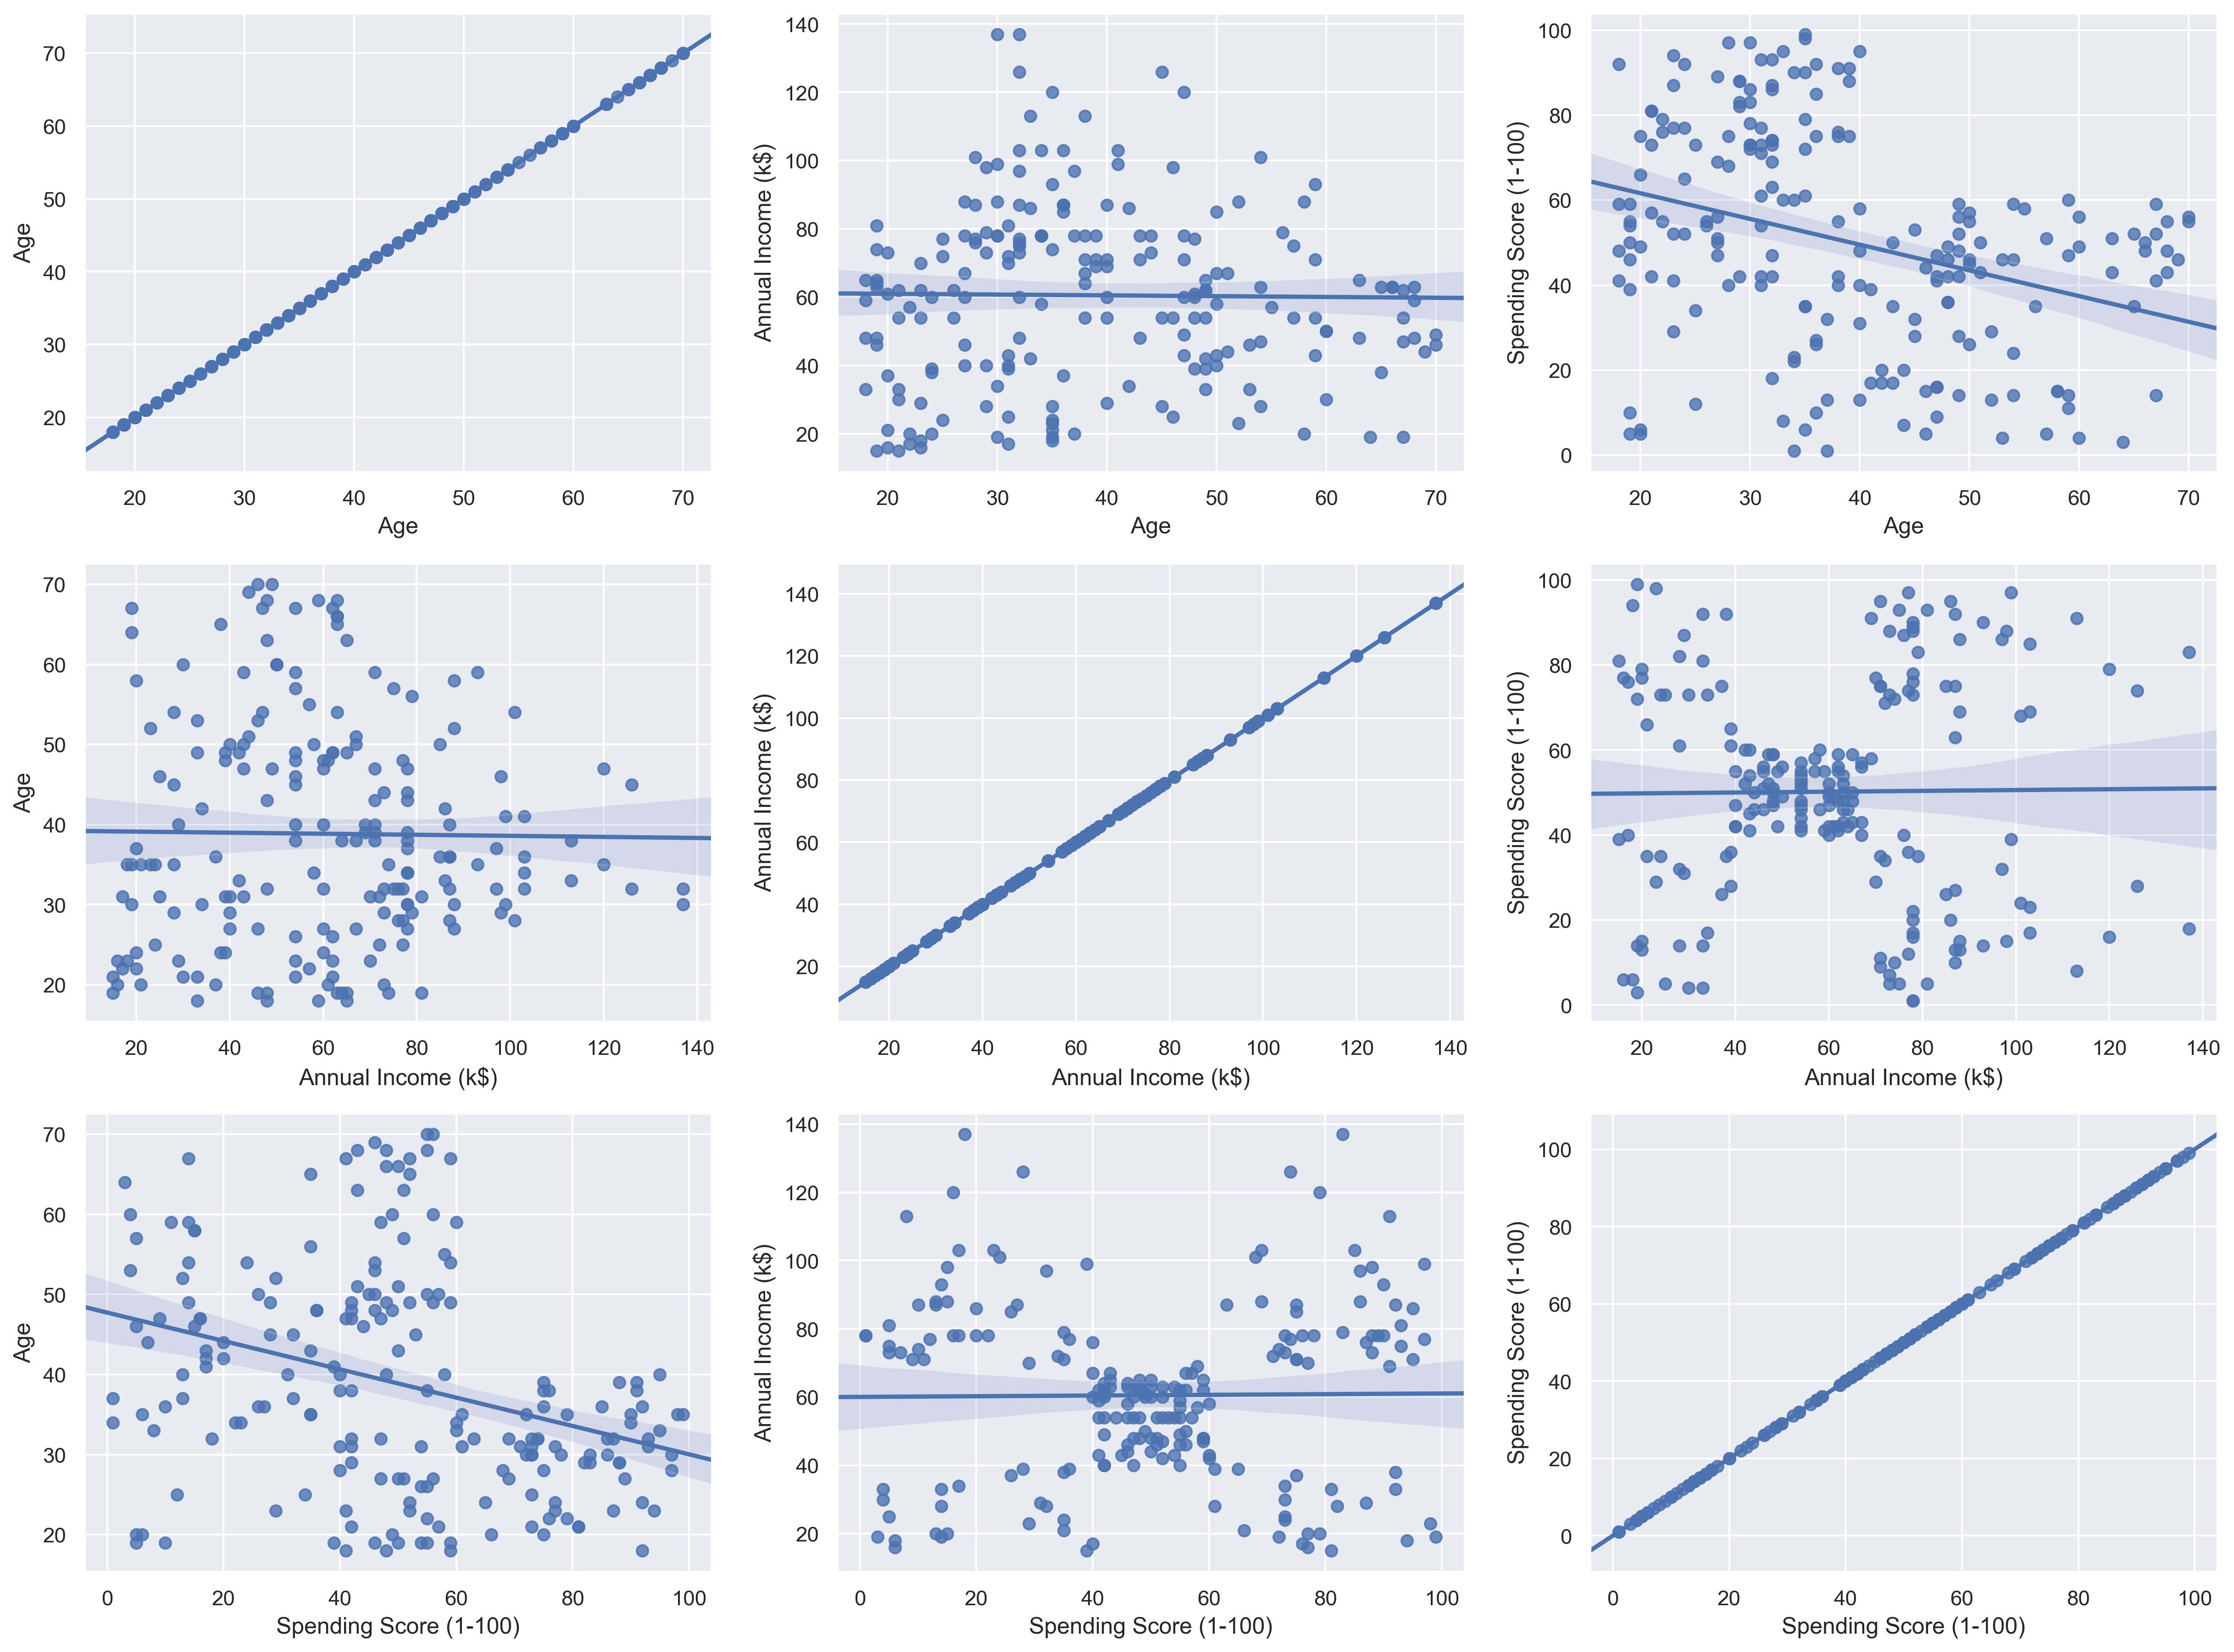

In [10]:
#regression plot between the variables
plt.figure(figsize=(20,15), dpi =300,facecolor='white')
n =0
for x in ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']:
    for y in ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']:
        n +=1
        plt.subplot(3,3,n) #3^2 combinations
        sns.regplot(x=data1[x], y=data1[y])
plt.show()        

In [11]:
#correlation between the three different classes
for x in ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']:
    data1.corr()[x].sort_values(ascending=False)

Age                       1.000000
Annual Income (k$)       -0.012398
Spending Score (1-100)   -0.327227
Name: Age, dtype: float64

Annual Income (k$)        1.000000
Spending Score (1-100)    0.009903
Age                      -0.012398
Name: Annual Income (k$), dtype: float64

Spending Score (1-100)    1.000000
Annual Income (k$)        0.009903
Age                      -0.327227
Name: Spending Score (1-100), dtype: float64

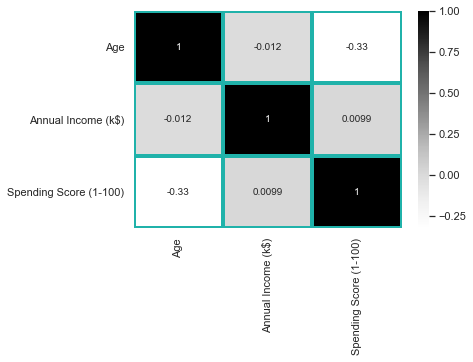

In [12]:
#heatmap dispaying correlations combinations
sns.heatmap(data1.corr(), annot=True, cmap="Greys", linecolor= 'lightseagreen', linewidths=3)

# Model Creation using K-Mean Clustering (Unsupervised  Algo)

In [13]:
data2 = data1.iloc[:, [1,2]].values
data2.shape

(200, 2)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=1, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=6, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=7, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=8, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=9, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=10, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

Text(0.5, 1.0, 'Elbow Method')

Text(0, 0.5, 'Total Within sum of square')

Text(0.5, 0, 'Number of Clusters K')

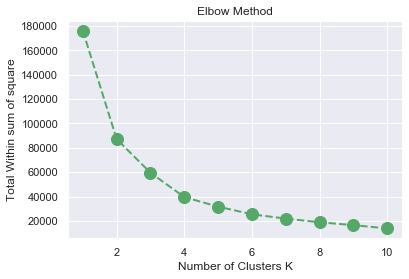

In [14]:
#Elbow Method
wss = []
for i in range(1,11):
    kmean = KMeans(n_clusters=i)
    kmean.fit(data2)
    wss.append(kmean.inertia_)#Sum of squared distances of samples to their closest cluster center
  
plt.subplot()
plt.plot(range(1,11), wss, 'go--', linewidth=2, markersize=12)
plt.title('Elbow Method')
plt.ylabel('Total Within sum of square')
plt.xlabel('Number of Clusters K')
plt.show()  

In [28]:
#segmentaion using Age and Spending Score
km = KMeans(n_clusters=4, random_state=42).fit(data2)
#ymeans = km.predict(data2) #same values with labels
centroids = km.cluster_centers_
labels = km.labels_ #Labels of each point(0's, 1's,2's,3's)

<Figure size 2100x1500 with 0 Axes>

Text(0.5, 1.0, 'Cluster of Ages')

Text(0.5, 0, 'Age')

Text(0, 0.5, 'Spending Score (1-100)')

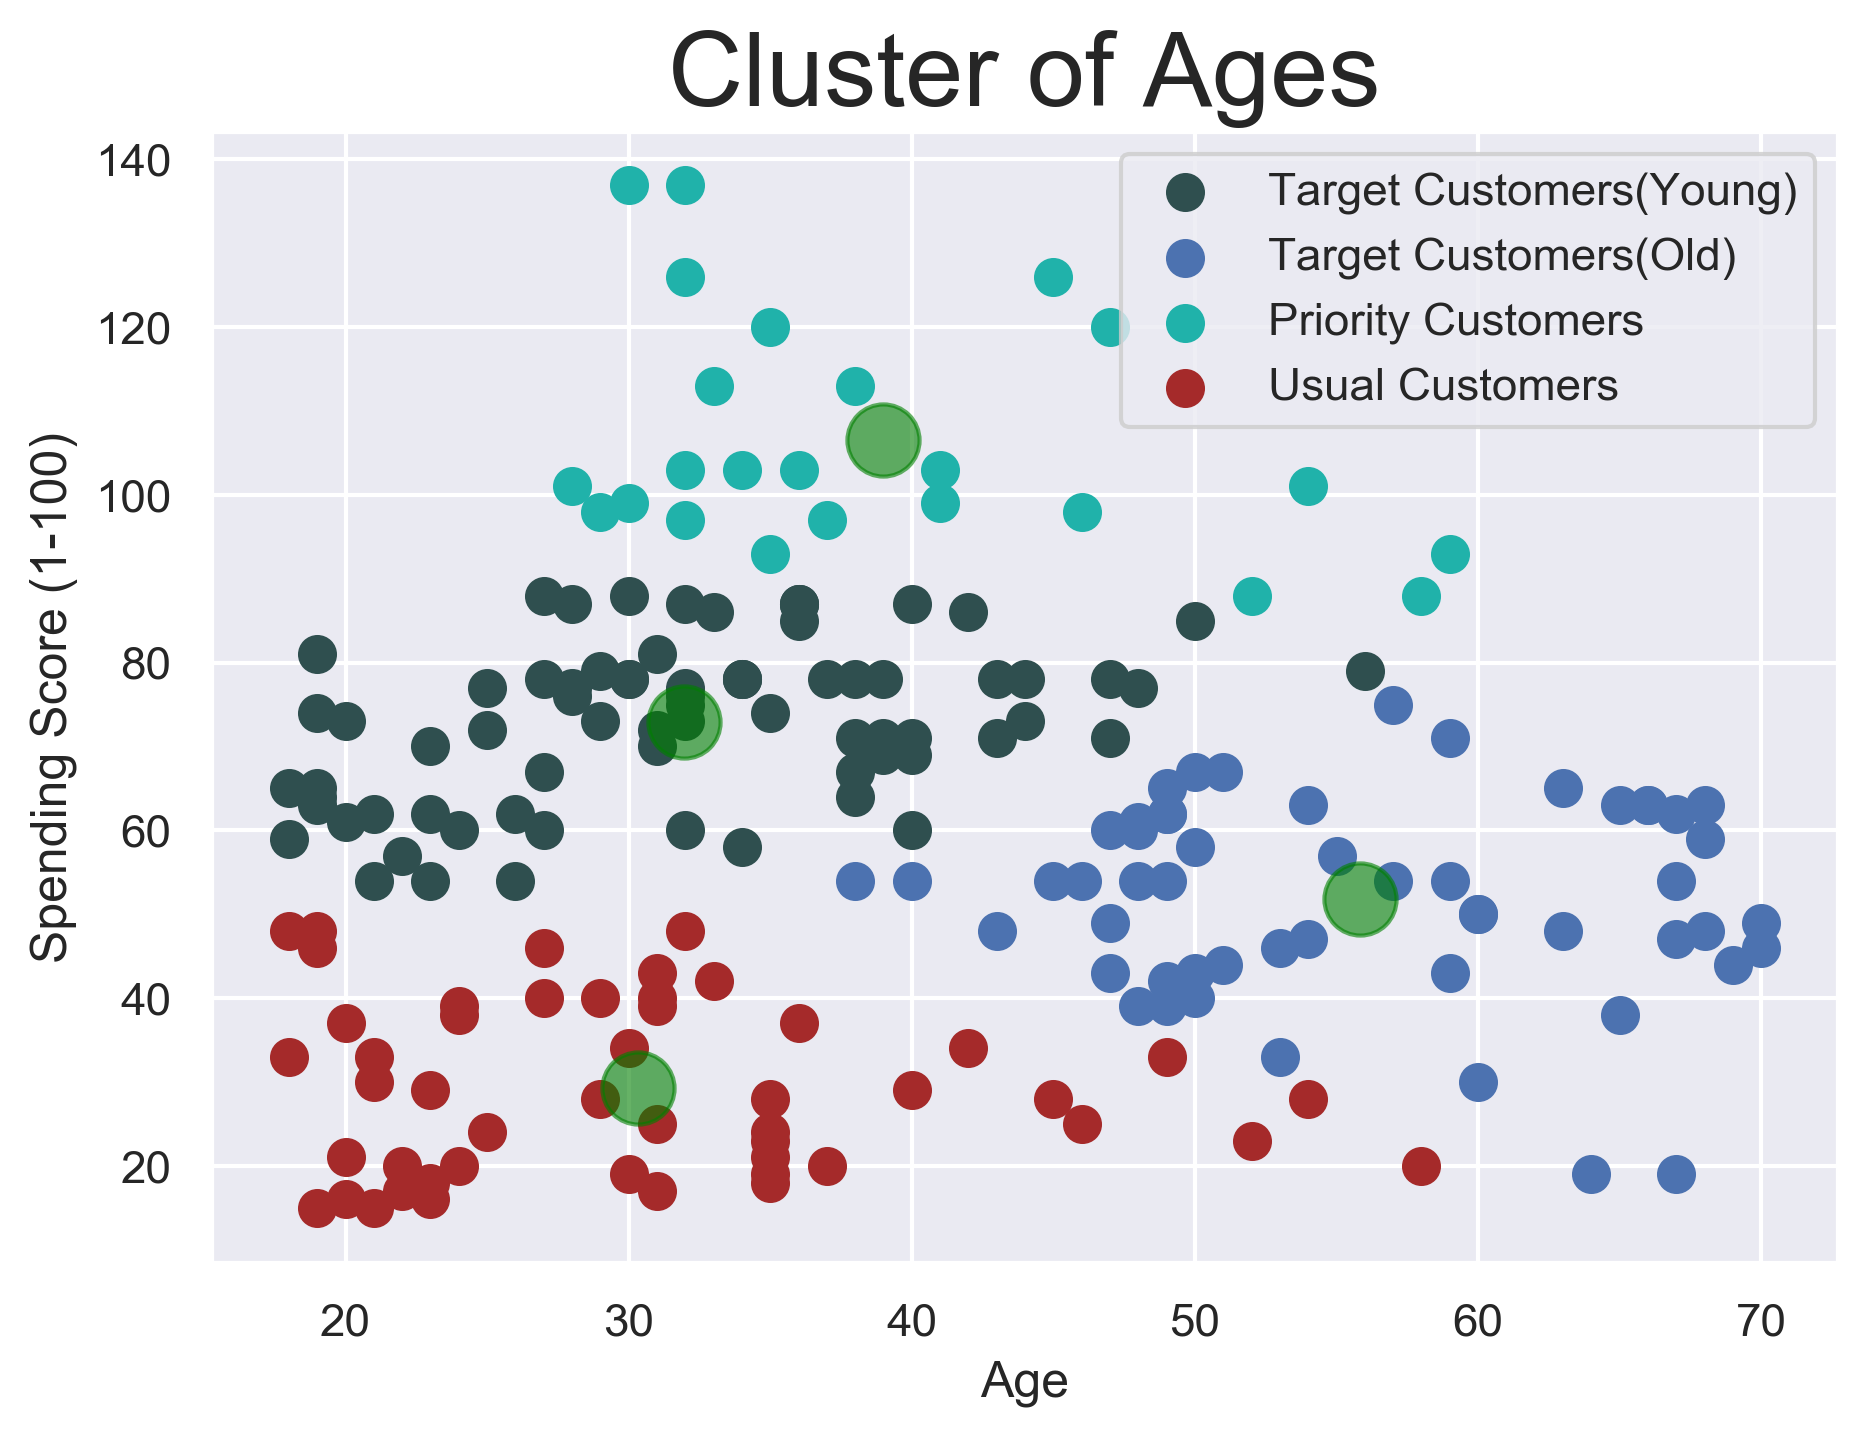

In [34]:
#visualization
colors = ['darkslategrey','b','lightseagreen','brown']
label1 = ['Usual Customers', 'Priority Customers', 'Target Customers(Young)', 'Target Customers(Old)']

plt.figure(figsize=(7,5), dpi=300)
plt.subplot()
plt.title('Cluster of Ages', fontsize = 25)

plt.scatter(x=data2[labels==0, 0], y=data2[labels==0 , 1], s = 70, c = 'darkslategrey', label = 'Target Customers(Young)')  
plt.scatter(x=data2[labels==1, 0], y=data2[labels==1 , 1], s = 70, c = 'b', label = 'Target Customers(Old)' ) 
plt.scatter(x=data2[labels==2, 0], y=data2[labels==2, 1], s = 70, c = 'lightseagreen' , label = 'Priority Customers') 
plt.scatter(x=data2[labels==3, 0], y=data2[labels==3 , 1], s = 70, c = 'brown', label = 'Usual Customers') 

plt.scatter(x = centroids[:,0], y = centroids[:,1], s = 300, c = 'green', alpha = 0.6)
plt.xlabel('Age')
plt.ylabel('Spending Score (1-100)')
plt.legend()

In [17]:
data3 = data1.iloc[:, [2,3]].values
data3.shape

(200, 2)

In [18]:
km = KMeans(n_clusters=5, random_state=42).fit(data3)
#ymeans = km.predict(data3) #same values with labels
centroids = km.cluster_centers_
labels = km.labels_ #Labels of each point(0's, 1's,2's,3's, etc)

<Figure size 4500x2100 with 0 Axes>

Text(0.5, 1.0, 'Cluster of Ages')

Text(0.5, 0, 'Annual Income (k$)')

Text(0, 0.5, 'Spending Score (1-100)')

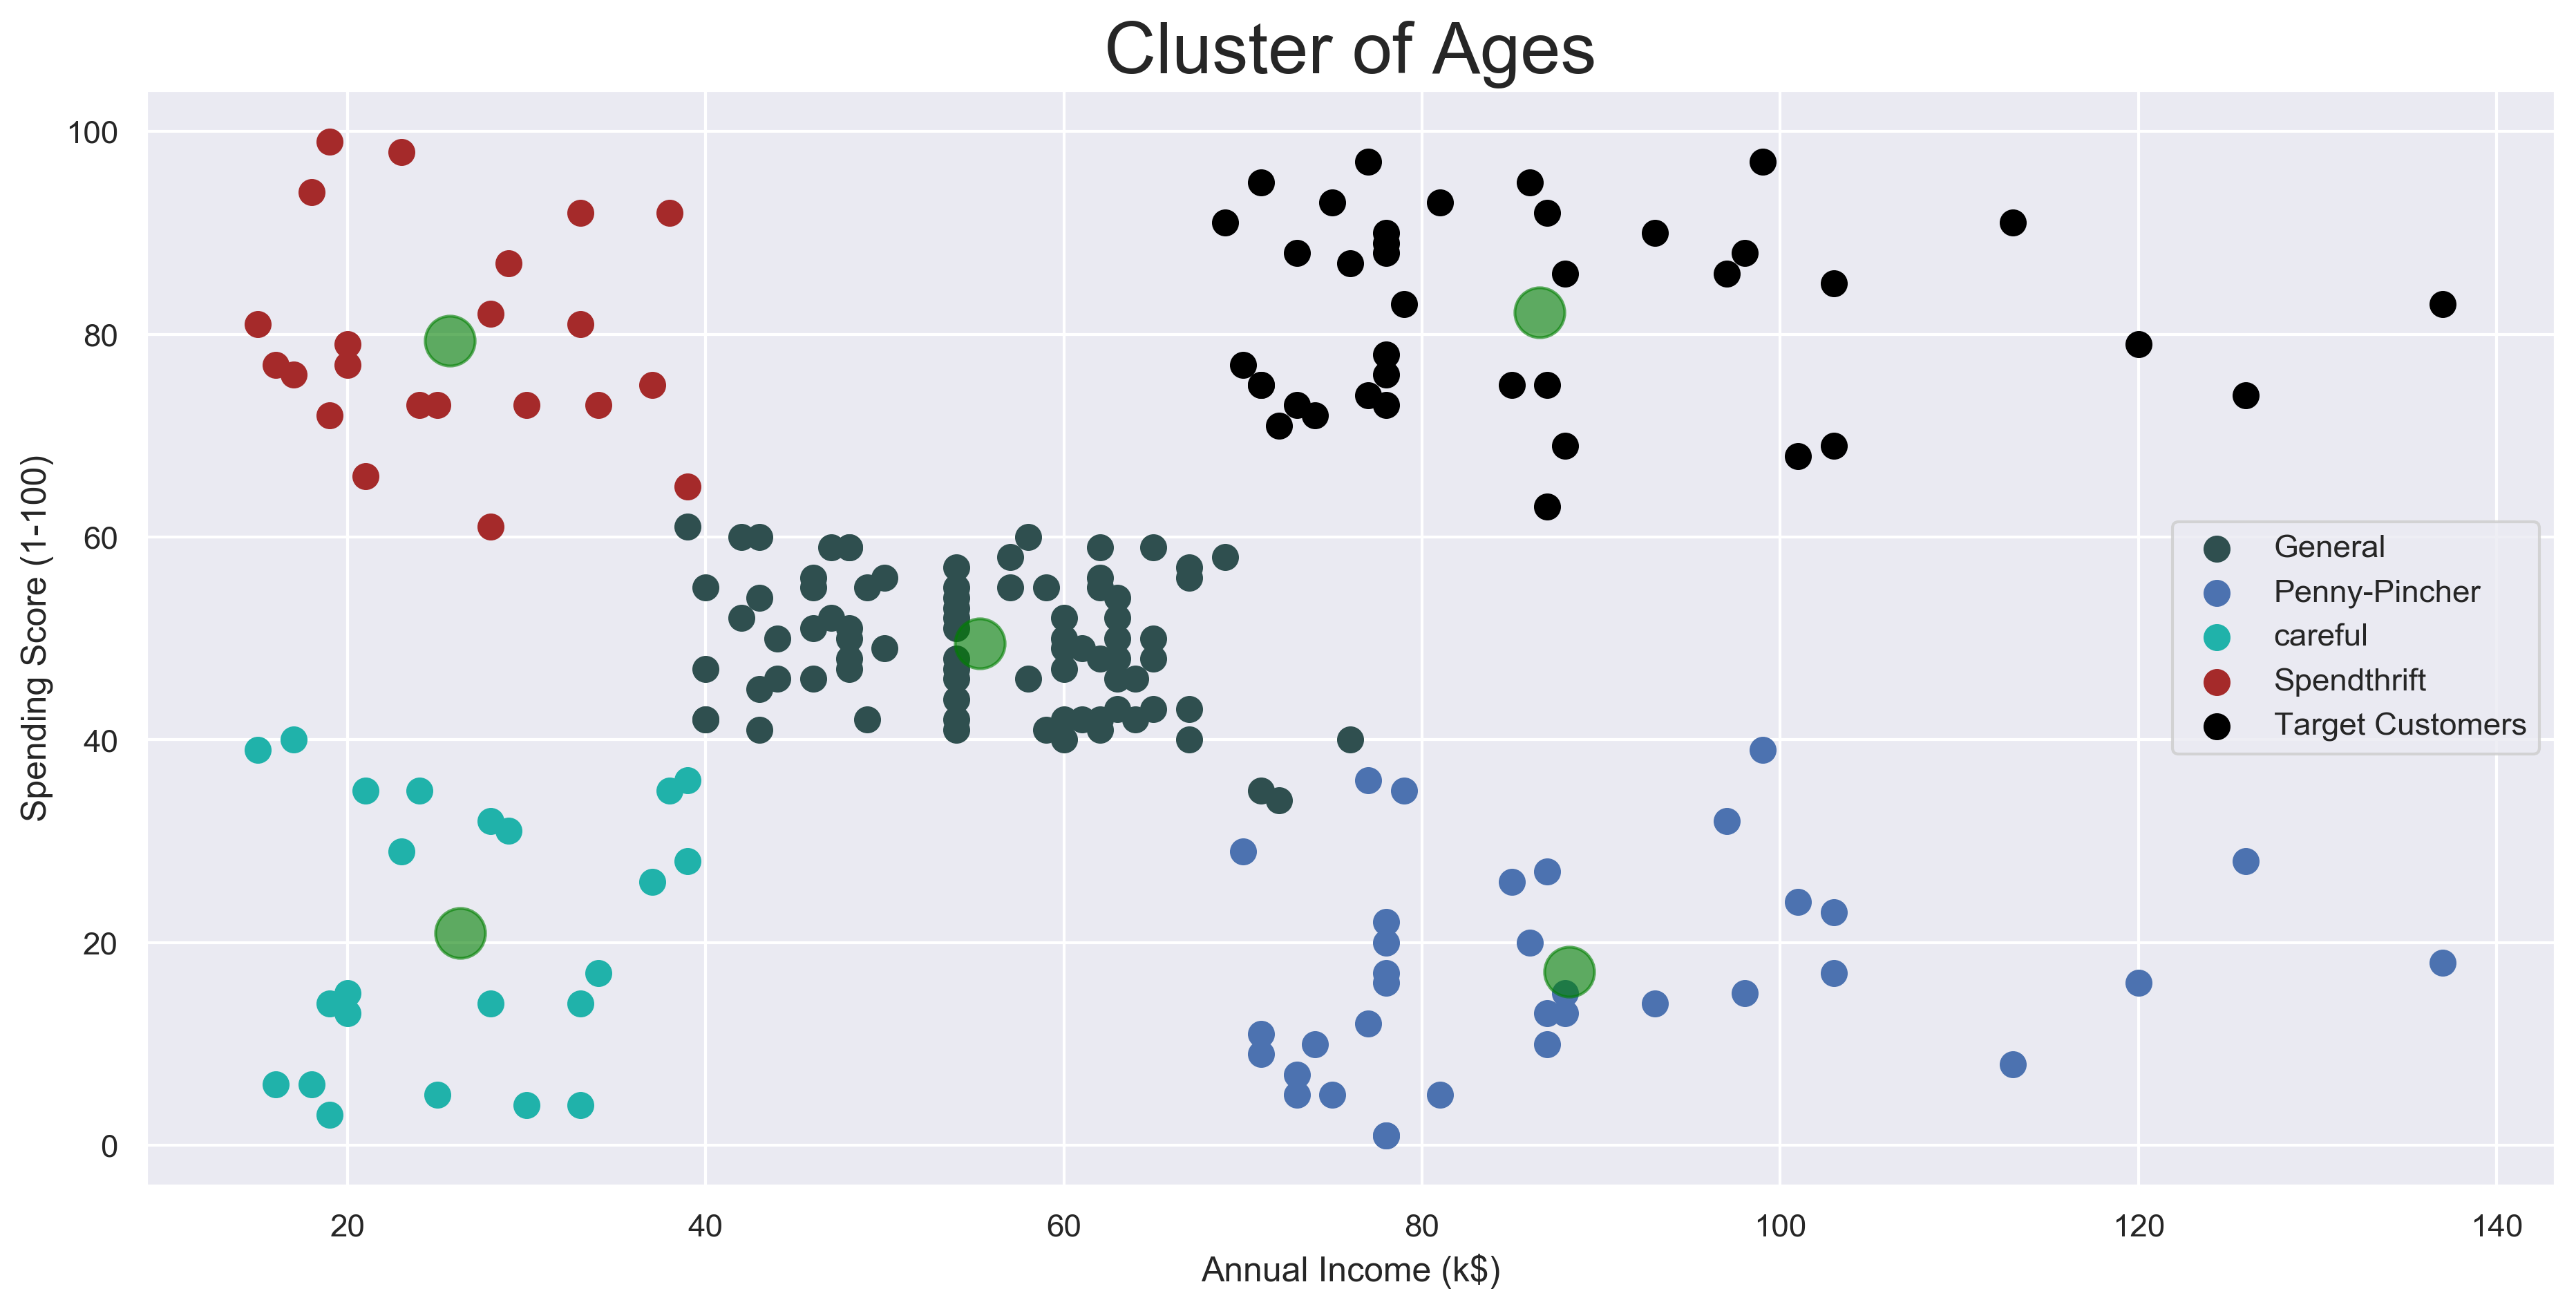

In [23]:
plt.figure(figsize=(15,7), dpi=300)
#plt.subplot()
plt.title('Cluster of Ages', fontsize = 25)

plt.scatter(x=data3[labels==0, 0], y=data3[labels==0 , 1], s = 70, c = 'darkslategrey', label = 'General')  
plt.scatter(x=data3[labels==1, 0], y=data3[labels==1 , 1], s = 70, c = 'b', label = 'Penny-Pincher' ) 
plt.scatter(x=data3[labels==2, 0], y=data3[labels==2, 1], s = 70, c = 'lightseagreen' , label = 'careful') 
plt.scatter(x=data3[labels==3, 0], y=data3[labels==3 , 1], s = 70, c = 'brown', label = 'Spendthrift') 
plt.scatter(x=data3[labels==4, 0], y=data3[labels==4 , 1], s = 70, c = 'black', label = 'Target Customers') 

plt.scatter(x = centroids[:,0], y = centroids[:,1], s = 300, c = 'green', alpha = 0.6)
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()